In [1]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os
import os.path
import fnmatch
from pathlib import Path
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models, losses, Model, optimizers
from sklearn.utils import shuffle
from tensorflow.keras.initializers import RandomUniform
import datetime as dt
from PIL import Image
import time
import glob


# ECG Image Dataset 
Here I load and read the data, then label each folder with its respective name:


*   **MI**
*   **HMI**
*   **AbnHB**
*   **Normal**


## Task 0 : Loading & Reading the ECG Image Dataset
## Task 1 : Cropping ECG Images &&  Background Removal
## Task 2 : Extracting 12 Leads of ECG Signal Image
## Task 3 : GLCM & Feature Extraction


### AB

# Task 0

In [2]:
#print('Getting ECG Images with Covid19')
#!wget "https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/gwbz3fsgp8-1.zip"

In [3]:
#!unzip gwbz3fsgp8-1.zip -d /kaggle/working/ECG_Covid/
#print("Done Unzipping into /ECG_Covid/ folder")

In [4]:
print('Getting ECG Images')
!wget "https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/gwbz3fsgp8-2.zip"

Getting ECG Images
--2021-08-13 21:07:14--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/gwbz3fsgp8-2.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.61.40
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.61.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203349349 (194M) [application/octet-stream]
Saving to: ‘gwbz3fsgp8-2.zip’

gwbz3fsgp8-2.zip    100%[===================>] 193.93M  27.2MB/s    in 8.0s    

2021-08-13 21:07:22 (24.3 MB/s) - ‘gwbz3fsgp8-2.zip’ saved [203349349/203349349]



In [5]:
!unzip gwbz3fsgp8-2.zip -d /kaggle/working/ECG_IM/
print("Done Unzipping into /ECG_IM/ folder")

Archive:  gwbz3fsgp8-2.zip
   creating: /kaggle/working/ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/
  inflating: /kaggle/working/ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/PMI(64).jpg  
  inflating: /kaggle/working/ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/PMI(136).jpg  
  inflating: /kaggle/working/ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/PMI(172).jpg  
  inflating: /kaggle/working/ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/PMI(28).jpg  
  inflating: /kaggle/working/ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/PMI(82).jpg  
  inflating: /kaggle/working/ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/PMI(154).jpg  
  inflating: /kaggle/working/ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/PMI(118).jpg  
  inflating: /kaggle/working/ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/PMI(46

In [6]:
# MI patients data
ECG_MI_dir_ = Path('./ECG_IM/ECG Images of Myocardial Infarction Patients (240x12=2880)')

# Filepaths:
ECG_MI_filepaths = list(ECG_MI_dir_.glob(r'**/*.jpg'))

# filename
MI_fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./ECG_IM/ECG Images of Myocardial Infarction Patients (240x12=2880)/")):
    for filename in fnmatch.filter(files, "*.jpg"):
        #print(filename)
        MI_fnames.append(filename)
# Mapping the labels
MI_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_MI_filepaths))
# Paths & labels 
ECG_MI_filepaths = pd.Series(ECG_MI_filepaths, name = 'filepath').astype(str)
MI_fnames = pd.Series(MI_fnames, name='filename')
MI_labels = pd.Series(MI_labels, name='label')

# Concatenating...
MI_df = pd.concat([MI_fnames,ECG_MI_filepaths, MI_labels], axis=1)
MI_df['label'] = "MI"

In [7]:
MI_df.head(3)

,filename,filepath,label
0,MI(137).jpg,ECG_IM/ECG Images of Myocardial Infarction Pat...,MI
1,MI(99).jpg,ECG_IM/ECG Images of Myocardial Infarction Pat...,MI
2,MI(154).jpg,ECG_IM/ECG Images of Myocardial Infarction Pat...,MI


Text(0.5, 1.0, 'label: MI ,filename: MI(137).jpg')

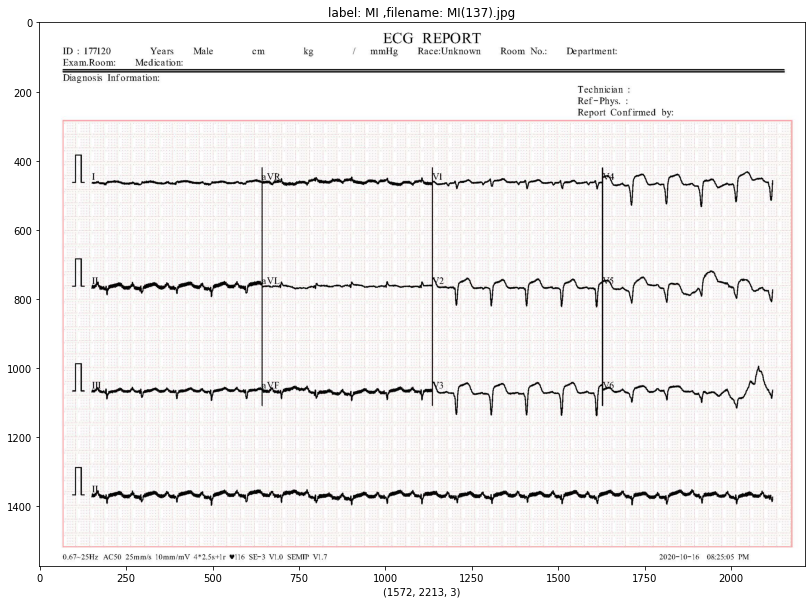

In [8]:
# Image Example of MI
figure = plt.figure(figsize=(20,10))
x = plt.imread(MI_df["filepath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(str('label: ')+MI_df["label"][0]+str(' ,filename: ') +str(MI_df['filename'][0]))

In [9]:
# HMI patients data
ECG_HMI_dir_ = Path('./ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)')

#FilePath
ECG_HMI_filepaths = list(ECG_HMI_dir_.glob(r'**/*.jpg'))

# filename
HMI_fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/")):
    for filename in fnmatch.filter(files, "*.jpg"):
        #print(filename)
        HMI_fnames.append(filename)

# Mapping the labels
HMI_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_HMI_filepaths))

# Filepath & labels
ECG_HMI_filepaths = pd.Series(ECG_HMI_filepaths, name = 'filepath').astype(str)
HMI_fnames = pd.Series(HMI_fnames, name='filename')
HMI_labels = pd.Series(HMI_labels, name='label')

# Concatenating...
HMI_df = pd.concat([HMI_fnames,ECG_HMI_filepaths, HMI_labels], axis=1)
HMI_df['label'] = "HMI"

Text(0.5, 1.0, 'label: HMI ,filename: PMI(53).jpg')

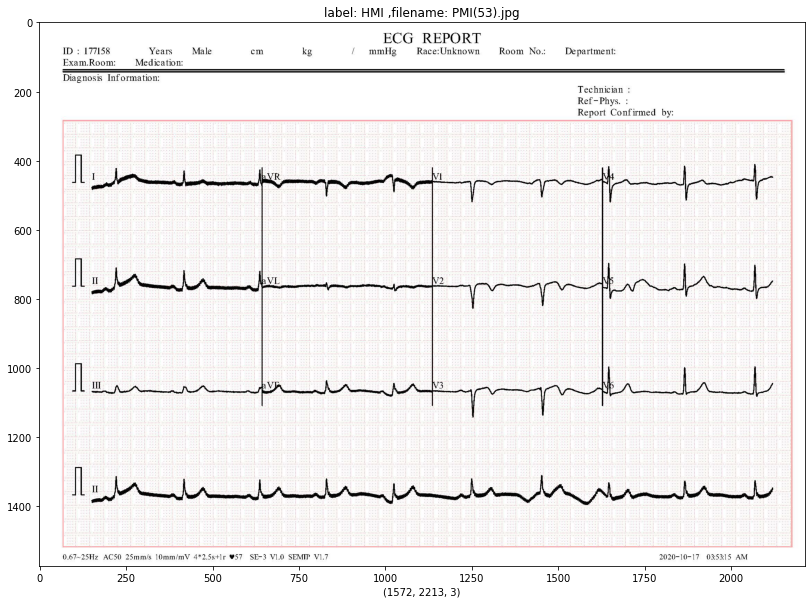

In [10]:
# Image Example of MI
figure = plt.figure(figsize=(20,10))
x = plt.imread(HMI_df["filepath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(str('label: ')+HMI_df["label"][0]+str(' ,filename: ') +str(HMI_df['filename'][0]))

In [11]:
# AbnHB patients data
ECG_AbnHB_dir_ = Path('./ECG_IM/ECG Images of Patient that have abnormal heartbeat (233x12=2796)')

#Filepath
ECG_AbnHB_filepaths = list(ECG_AbnHB_dir_.glob(r'**/*.jpg'))

# filename
AbnHB_fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./ECG_IM/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/")):
    for filename in fnmatch.filter(files, "*.jpg"):
        #print(filename)
        AbnHB_fnames.append(filename)
# Mapping the labels
AbnHB_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_AbnHB_filepaths))

# Filepaths & labels 
ECG_AbnHB_filepaths = pd.Series(ECG_AbnHB_filepaths, name = 'filepath').astype(str)
AbnHB_fnames = pd.Series(AbnHB_fnames, name='filename')
AbnHB_labels = pd.Series(AbnHB_labels, name='label')

# Concatenating...
AbnHB_df = pd.concat([AbnHB_fnames,ECG_AbnHB_filepaths, AbnHB_labels], axis=1)
AbnHB_df['label'] = "ABNORMAL"

Text(0.5, 1.0, 'label: ABNORMAL ,filename: HB(93).jpg')

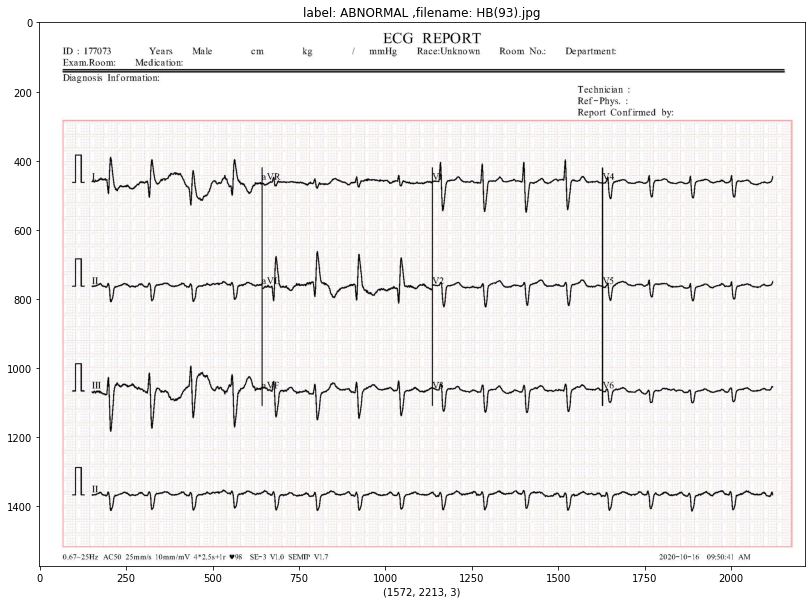

In [12]:
# Image Example of MI
figure = plt.figure(figsize=(20,10))
x = plt.imread(AbnHB_df["filepath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(str('label: ')+AbnHB_df["label"][0]+str(' ,filename: ') +str(AbnHB_df['filename'][0]))

In [13]:
AbnHB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  233 non-null    object
 1   filepath  233 non-null    object
 2   label     233 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB


In [14]:
# Normal patients data
ECG_Normal_dir_ = Path('./ECG_IM/Normal Person ECG Images (284x12=3408)')
#Filepath
ECG_Normal_filepaths = list(ECG_Normal_dir_.glob(r'**/*.jpg'))

# filename
Normal_fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./ECG_IM/Normal Person ECG Images (284x12=3408)/")):
    for filename in fnmatch.filter(files, "*.jpg"):
        #print(filename)
        Normal_fnames.append(filename)
        
# Mapping the labels
Normal_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_Normal_filepaths))
# Paths & labels femalee eyes
ECG_Normal_filepaths = pd.Series(ECG_Normal_filepaths, name = 'filepath').astype(str)
Normal_fnames = pd.Series(Normal_fnames, name='filename')
Normal_labels = pd.Series(Normal_labels, name='label')

# Concatenating...
Normal_df = pd.concat([Normal_fnames,ECG_Normal_filepaths, Normal_labels], axis=1)
Normal_df['label'] = "NORMAL"

Text(0.5, 1.0, 'label: NORMAL ,filename: Normal(259).jpg')

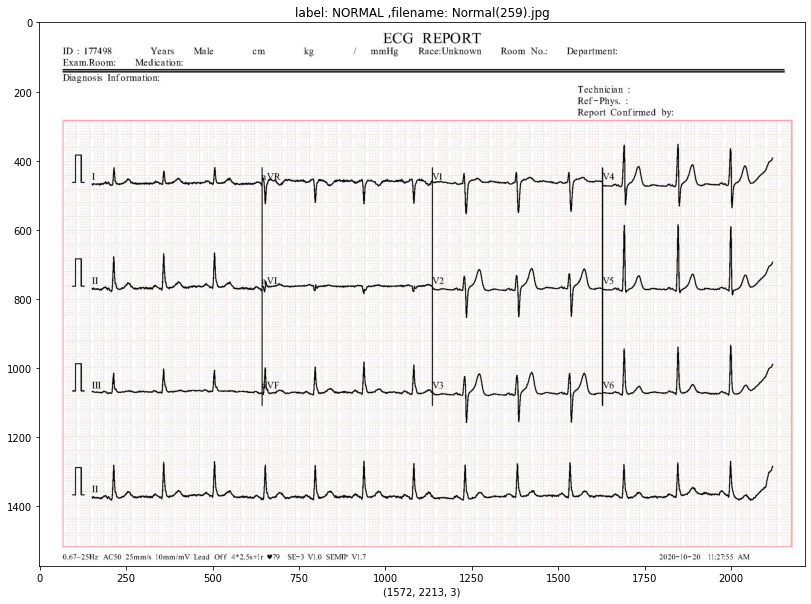

In [15]:
# Image Example of MI
figure = plt.figure(figsize=(20,10))
x = plt.imread(Normal_df["filepath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(str('label: ')+Normal_df["label"][0]+str(' ,filename: ') +str(Normal_df['filename'][0]))

# Task 1:

In [16]:
def im_crop(image,left=71.5, top= 287.5, right=2102, bottom= 1228):
    """ This function is used to crop the image and get just the ECG signals.
      input: 
        image : the image (jpg,png,...Etc)
        left: location in left of image
        top: location in top of image
        right: location in right of image
        bottom: location in bottom of image

        ######
        # choices from paper: left=71.5, top= 287.5, right=2102, bottom= 1228
        ######
      output: 
        img_out: the cropped ECG image.
  """
    img = Image.open(image)
    img_out = img.crop((left, top, right, bottom))
  

    return img_out



def bg_remover(image,name):
  
    # The Image will be of type PIL.Image.Image , so we will convert it to np.asarray:
    img = np.asarray(image)
    
    # convert to graky
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # threshold input image as mask
    mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

    # negate mask
    mask = 255 - mask

    # apply morphology to remove isolated extraneous noise
    # use borderconstant of black since foreground touches the edges
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # anti-alias the mask -- blur then stretch
    # blur alpha channel
    mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

    # linear stretch so that 127.5 goes to 0, but 255 stays 255
    mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

    # put mask into alpha channel
    result = img.copy()
    result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
    result[:, :, 3] = mask

    # save resulting masked image
    cv2.imwrite('/kaggle/working/outECG/'+ str(name), result)
    #Image.fromarray(result).save('/kaggle/working/outECG/'+ str(name)+str('.png'))
    result = Image.fromarray(result)
    return result

In [17]:
#!rm -rv /kaggle/working/outECG/

In [18]:
# Output folder for the respective categories of ECG Images after Cropping & Background Removal
!mkdir /kaggle/working/outECG/
!mkdir /kaggle/working/outECG/MI_c_bg/
!mkdir /kaggle/working/outECG/HMI_c_bg/
!mkdir /kaggle/working/outECG/AbnHB_c_bg/
!mkdir /kaggle/working/outECG/Normal_c_bg/

In [19]:
%%time
# MI images
MI_c_bg= []
for i in range(0,MI_df.shape[0]):
    MI_c_bg.append(bg_remover(im_crop(MI_df["filepath"][i]),'MI_c_bg/' + str(MI_df["filename"][i])))



CPU times: user 32.8 s, sys: 2.79 s, total: 35.6 s
Wall time: 29 s


In [20]:
%%time
# HMI images
HMI_c_bg= []
for i in range(0,HMI_df.shape[0]):
    HMI_c_bg.append(bg_remover(im_crop(HMI_df["filepath"][i]),'HMI_c_bg/' + str(HMI_df["filename"][i])))

CPU times: user 23.3 s, sys: 2.03 s, total: 25.3 s
Wall time: 20.6 s


In [21]:
%%time
# Normal images
Normal_c_bg= []
for i in range(0,Normal_df.shape[0]):
    Normal_c_bg.append(bg_remover(im_crop(Normal_df["filepath"][i]), 'Normal_c_bg/' + str(Normal_df["filename"][i])))


CPU times: user 38.3 s, sys: 4.32 s, total: 42.7 s
Wall time: 34.8 s


In [22]:
%%time
# Abnormal HB images
AbnHB_c_bg= []
for i in range(0,AbnHB_df.shape[0]):
    AbnHB_c_bg.append(bg_remover(im_crop(AbnHB_df["filepath"][i]),'AbnHB_c_bg/' + str(AbnHB_df["filename"][i]) ))


CPU times: user 31.8 s, sys: 5.04 s, total: 36.9 s
Wall time: 31.3 s


In [ ]:
!rm -r  ECG_Cropped.zip
!zip -r ECG_Cropped.zip ./outECG


### **Creating Dataframes from the croped images to use in next task **


In [24]:
# To use it for Segmenting 12 leads
MI_c_bg_df = pd.DataFrame(MI_c_bg, columns=['PilImage'])
MI_c_bg_df['filename']= MI_df["filename"]
MI_c_bg_df['filename'].replace({"\(":"_",'\).jpg':''}, regex=True,inplace=True)
MI_c_bg_df.head()

,PilImage,filename
0,<PIL.Image.Image image mode=RGBA size=2030x940...,MI_137
1,<PIL.Image.Image image mode=RGBA size=2030x940...,MI_99
2,<PIL.Image.Image image mode=RGBA size=2030x940...,MI_154
3,<PIL.Image.Image image mode=RGBA size=2030x940...,MI_49
4,<PIL.Image.Image image mode=RGBA size=2030x940...,MI_2


In [25]:
# To use it for Segmenting 12 leads
HMI_c_bg_df = pd.DataFrame(HMI_c_bg, columns=['PilImage'])
HMI_c_bg_df['filename']= HMI_df["filename"]
HMI_c_bg_df['filename'].replace({"\(":"_",'\).jpg':''}, regex=True,inplace=True)
HMI_c_bg_df.head()

,PilImage,filename
0,<PIL.Image.Image image mode=RGBA size=2030x940...,PMI_53
1,<PIL.Image.Image image mode=RGBA size=2030x940...,PMI_73
2,<PIL.Image.Image image mode=RGBA size=2030x940...,PMI_85
3,<PIL.Image.Image image mode=RGBA size=2030x940...,PMI_59
4,<PIL.Image.Image image mode=RGBA size=2030x940...,PMI_169


In [26]:
# To use it for Segmenting 12 leads
AbnHB_c_bg_df = pd.DataFrame(AbnHB_c_bg, columns=['PilImage'])
AbnHB_c_bg_df['filename']= AbnHB_df["filename"]
AbnHB_c_bg_df['filename'].replace({"\(":"_",'\).jpg':''}, regex=True,inplace=True)
AbnHB_c_bg_df.head()

,PilImage,filename
0,<PIL.Image.Image image mode=RGBA size=2030x940...,HB_93
1,<PIL.Image.Image image mode=RGBA size=2030x940...,HB_34
2,<PIL.Image.Image image mode=RGBA size=2030x940...,HB_165
3,<PIL.Image.Image image mode=RGBA size=2030x940...,HB_76
4,<PIL.Image.Image image mode=RGBA size=2030x940...,HB_212


In [27]:
# To use it for Segmenting 12 leads
Normal_c_bg_df = pd.DataFrame(Normal_c_bg, columns=['PilImage'])
Normal_c_bg_df['filename']= Normal_df["filename"]
Normal_c_bg_df['filename'].replace({"\(":"_",'\).jpg':''}, regex=True,inplace=True)
Normal_c_bg_df.head()

,PilImage,filename
0,<PIL.Image.Image image mode=RGBA size=2030x940...,Normal_259
1,<PIL.Image.Image image mode=RGBA size=2030x940...,Normal_228
2,<PIL.Image.Image image mode=RGBA size=2030x940...,Normal_95
3,<PIL.Image.Image image mode=RGBA size=2030x940...,Normal_183
4,<PIL.Image.Image image mode=RGBA size=2030x940...,Normal_136


# Task 2: 

* Crate folders for the 12 leads


# Output folder for the respective categories of ECG Images after Cropping & Background Removal

* !mkdir /kaggle/working/ECG_leads/


* !mkdir -p /kaggle/working/ECG_leads/MI/{I,I_Neg,II,II_Neg,III,III_Neg,aVR,aVR_Neg,aVL,aVL_Neg,aVF,aVF_Neg,V1,V2,V3,V4,V5,V6}/

* !mkdir -p /kaggle/working/ECG_leads/HMI/{I,I_Neg,II,II_Neg,III,III_Neg,aVR,aVR_Neg,aVL,aVL_Neg,aVF,aVF_Neg,V1,V2,V3,V4,V5,V6}/

* !mkdir -p /kaggle/working/ECG_leads/AbnHB/{I,I_Neg,II,II_Neg,III,III_Neg,aVR,aVR_Neg,aVL,aVL_Neg,aVF,aVF_Neg,V1,V2,V3,V4,V5,V6}/

* !mkdir -p /kaggle/working/ECG_leads/Normal/{I,I_Neg,II,II_Neg,III,III_Neg,aVR,aVR_Neg,aVL,aVL_Neg,aVF,aVF_Neg,V1,V2,V3,V4,V5,V6}/

In [28]:
!mkdir /kaggle/working/ECG_leads/
!mkdir -p /kaggle/working/ECG_leads/MI/{I,I_Neg,II,II_Neg,III,III_Neg,aVR,aVR_Neg,aVL,aVL_Neg,aVF,aVF_Neg,V1,V2,V3,V4,V5,V6}/
!mkdir -p /kaggle/working/ECG_leads/HMI/{I,I_Neg,II,II_Neg,III,III_Neg,aVR,aVR_Neg,aVL,aVL_Neg,aVF,aVF_Neg,V1,V2,V3,V4,V5,V6}/
!mkdir -p /kaggle/working/ECG_leads/AbnHB/{I,I_Neg,II,II_Neg,III,III_Neg,aVR,aVR_Neg,aVL,aVL_Neg,aVF,aVF_Neg,V1,V2,V3,V4,V5,V6}/
!mkdir -p /kaggle/working/ECG_leads/Normal/{I,I_Neg,II,II_Neg,III,III_Neg,aVR,aVR_Neg,aVL,aVL_Neg,aVF,aVF_Neg,V1,V2,V3,V4,V5,V6}/

* Function to Extract the 12 Leads.

I will try to Place each lead into its respective Repository, any Idea how to do it ?

In [29]:
def seg_save_12leads(image,folder,name, width= 315, height= 315):

    # Segment 12 Leads of ECG Signal
    I_img   = image.crop((120.5, 0.5, width + 120.5 , 0.5 + height)).convert('L') # Converting Images to Grayscale
    II_img  = image.crop((120.5, 315.5, width + 120.5 , 315.5+ height)).convert('L')
    III_img = image.crop((120.5, 630.5, width + 120.5 , 630.5+ height)).convert('L')
    aVR_img = image.crop((672.5, 0.5, width + 672.5 , 0.5 + height)).convert('L')
    aVL_img = image.crop((672.5, 315.5, width + 672.5 , 315.5+ height)).convert('L')
    aVF_img = image.crop((672.5, 630.5, width + 672.5 , 630.5+ height)).convert('L')
    V1_img  = image.crop((1133.5, 0.5, width + 1133.5 , 0.5+ height)).convert('L')
    V2_img  = image.crop((1133.5, 315.5, width + 1133.5 , 315.5+ height)).convert('L')
    V3_img  = image.crop((1133.5, 630.5, width + 1133.5 , 630.5+ height)).convert('L')
    V4_img  = image.crop((1639.5, 0.5, width + 1639.5 , 0.5 + height)).convert('L')
    V5_img  = image.crop((1639.5, 0.5, width + 1639.5 , 0.5+ height)).convert('L')
    V6_img  = image.crop((1639.5, 630.5, width + 1639.5 , 630.5+ height)).convert('L')
    
    
    # Negative leads I,II,III, aVR,aVL,aVF
    
    I_neg_img   = Image.fromarray(cv2.flip(np.asarray(I_img),0)) # Vertical Flip
    II_neg_img  = Image.fromarray(cv2.flip(np.asarray(II_img),0)) # Vertical Flip
    III_neg_img = Image.fromarray(cv2.flip(np.asarray(III_img),0)) # Vertical Flip
    aVR_neg_img = Image.fromarray(cv2.flip(np.asarray(aVR_img),0)) # Vertical Flip
    aVL_neg_img = Image.fromarray(cv2.flip(np.asarray(aVL_img),0)) # Vertical Flip
    aVF_neg_img = Image.fromarray(cv2.flip(np.asarray(aVL_img),0)) # Vertical Flip
    
    
    # Save 12 leads to respective folder
    
    I_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/I/')+ str(name)+str('.png'))
    I_neg_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/I_Neg/')+ str(name)+str('.png'))
    II_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/II/')+ str(name)+str('.png'))
    II_neg_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/II_Neg/')+ str(name)+str('.png'))
    III_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/III/')+ str(name)+str('.png'))
    III_neg_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/III_Neg/')+ str(name)+str('.png'))
    aVR_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/aVR/')+ str(name)+str('.png'))
    aVR_neg_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/aVR_Neg/')+ str(name)+str('.png'))
    aVL_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/aVL/')+ str(name)+str('.png'))
    aVL_neg_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/aVL_Neg/')+ str(name)+str('.png'))
    aVF_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/aVF/')+ str(name)+str('.png'))
    aVF_neg_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/aVF_Neg/')+ str(name)+str('.png'))
    V1_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/V1/')+ str(name)+str('.png'))
    V2_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/V2/')+ str(name)+str('.png'))
    V3_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/V3/')+ str(name)+str('.png'))
    V4_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/V4/')+ str(name)+str('.png'))
    V5_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/V5/')+ str(name)+str('.png'))
    V6_img.save('/kaggle/working/ECG_leads/'+str(folder)+str('/V6/')+ str(name)+str('.png'))
    
    return I_img, I_neg_img, II_img, II_neg_img, III_img,III_neg_img,aVR_img,aVR_neg_img,aVL_img, aVL_neg_img, aVF_img, aVF_neg_img,V1_img,V2_img,V3_img,V4_img,V5_img,V6_img
    

## Applying the function to segment 12leads from the ECG Image and Save them to respective folder/subfolder.

In [30]:
%%time
# MI 12_leads images
for i in range(0,MI_c_bg_df.shape[0]):
    seg_save_12leads(image=MI_c_bg_df["PilImage"][i],folder='MI', name= str(MI_c_bg_df["filename"][i]))

# Well Saved

CPU times: user 23.2 s, sys: 582 ms, total: 23.8 s
Wall time: 23.8 s


In [31]:
%%time
# MI 12_leads images
for i in range(0,HMI_c_bg_df.shape[0]):
    seg_save_12leads(image=HMI_c_bg_df["PilImage"][i],folder='HMI', name= str(HMI_c_bg_df["filename"][i]))

# Well Saved

CPU times: user 15.4 s, sys: 358 ms, total: 15.8 s
Wall time: 15.8 s


In [32]:
%%time
# MI 12_leads images
for i in range(0,AbnHB_c_bg_df.shape[0]):
    seg_save_12leads(image=AbnHB_c_bg_df["PilImage"][i],folder='AbnHB', name= str(AbnHB_c_bg_df["filename"][i]))

# Well Saved

CPU times: user 22.1 s, sys: 529 ms, total: 22.7 s
Wall time: 22.7 s


In [33]:
%%time
# MI 12_leads images
for i in range(0,Normal_c_bg_df.shape[0]):
    seg_save_12leads(image=Normal_c_bg_df["PilImage"][i],folder='Normal', name= str(Normal_c_bg_df["filename"][i]))

# Well Saved

CPU times: user 24.9 s, sys: 642 ms, total: 25.6 s
Wall time: 25.6 s


**Test the images were saved**

In [34]:
# to test the images were well saved...
fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./ECG_leads/AbnHB/I/")):
    for filename in fnmatch.filter(files, "*.png"):
        #print(filename)
        fnames.append(filename)
print(len(fnames))


233


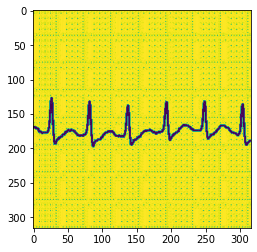

In [35]:
x = plt.imread(r"./ECG_leads/AbnHB/I/HB_31.png")
plt.imshow(x)

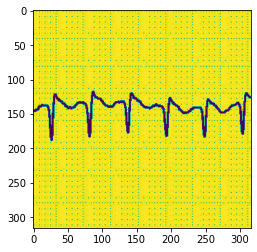

In [36]:
x_neg = plt.imread(r"./ECG_leads/AbnHB/I_Neg/HB_31.png")
plt.imshow(x_neg)

#### The 12 Leads were segmented to their respective folder & subfolders 

**Now time to train.**

In [37]:
def img_seg_12leads(image, width= 315, height= 315):
    """ This function is used to crop the image and get 12 leads of  the ECG signals.
      input: 
        image : the image cropped of ECG Signal
        width = 315
        height = 315

        ######
        # choices from paper & repo : https://github.com/mkfzdmr/COVID-19-ECG-Classification
        ######
      output: 
        12 img_out: 12 leads ECG
    """

    # With ECG 12leads order 
    I_img   = image.crop((120.5, 0.5, width + 120.5 , 0.5 + height)).convert('L') # Converting Images to Grayscale 
    II_img  = image.crop((120.5, 315.5, width + 120.5 , 315.5+ height)).convert('L')
    III_img = image.crop((120.5, 630.5, width + 120.5 , 630.5+ height)).convert('L')
    aVL_img = image.crop((672.5, 315.5, width + 672.5 , 315.5+ height)).convert('L')
    aVR_img = image.crop((672.5, 0.5, width + 672.5 , 0.5 + height)).convert('L')
    aVF_img = image.crop((672.5, 630.5, width + 672.5 , 630.5+ height)).convert('L')
    V1_img  = image.crop((1133.5, 0.5, width + 1133.5 , 0.5+ height)).convert('L')
    V2_img  = image.crop((1133.5, 315.5, width + 1133.5 , 315.5+ height)).convert('L')
    V3_img  = image.crop((1133.5, 630.5, width + 1133.5 , 630.5+ height)).convert('L')
    V4_img  = image.crop((1639.5, 0.5, width + 1639.5 , 0.5 + height)).convert('L')
    V5_img  = image.crop((1639.5, 0.5, width + 1639.5 , 0.5+ height)).convert('L')
    V6_img  = image.crop((1639.5, 630.5, width + 1639.5 , 630.5+ height)).convert('L')

    plt.figure(figsize=(20,10))
    plt.subplot(4,4,1)
    plt.imshow(image)
    plt.title("Original")

    plt.subplot(4,4,2)
    plt.imshow(I_img)
    plt.title("I Lead")
  
    plt.subplot(4,4,3)
    plt.imshow(II_img)
    plt.title("II Lead")

    plt.subplot(4,4,4)
    plt.imshow(III_img)
    plt.title("III Lead")

    plt.subplot(4,4,5)
    plt.imshow(V1_img)
    plt.title("V1 Lead")

    plt.subplot(4,4,6)
    plt.imshow(V2_img)
    plt.title("V2 Lead")

    plt.subplot(4,4,7)
    plt.imshow(V3_img)
    plt.title("V3 Lead")

    plt.subplot(4,4,8)
    plt.imshow(V4_img)
    plt.title("V4 Lead")

    plt.subplot(4,4,9)
    plt.imshow(V5_img)
    plt.title("V5 Lead")

    plt.subplot(4,4,10)
    plt.imshow(V6_img)
    plt.title("V6 Lead")

    plt.subplot(4,4,11)
    plt.imshow(aVR_img)
    plt.title("aVR Lead")

    plt.subplot(4,4,12)
    plt.imshow(aVL_img)
    plt.title("aVL Lead")

    plt.subplot(4,4,13)
    plt.imshow(aVF_img)
    plt.title("aVF Lead")

    plt.show()

    
    
    return I_img,II_img,III_img,aVR_img,aVL_img, aVF_img,V1_img,V2_img,V3_img,V4_img,V5_img,V6_img

In [38]:
%%time
#Example : 
#I_img,II_img,III_img,aVR_img,aVL_img, aVF_img,V1_img,V2_img,V3_img,V4_img,V5_img,V6_img = img_seg_12leads(img_res)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


# Task 3:

* GLCM Functions



In [39]:
def fast_glcm(img, vmin=0, vmax=255, nbit=8, kernel_size=5):
    mi, ma = vmin, vmax
    ks = kernel_size
    h,w = img.shape

    # digitize
    bins = np.linspace(mi, ma+1, nbit+1)
    gl1 = np.digitize(img, bins) - 1
    gl2 = np.append(gl1[:,1:], gl1[:,-1:], axis=1)

    # make glcm
    glcm = np.zeros((nbit, nbit, h, w), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            mask = ((gl1==i) & (gl2==j))
            glcm[i,j, mask] = 1

    kernel = np.ones((ks, ks), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)

    glcm = glcm.astype(np.float32)
    return glcm


def fast_glcm_mean(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm mean
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    return mean


def fast_glcm_std(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm std
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    std2 = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            std2 += (glcm[i,j] * i - mean)**2

    std = np.sqrt(std2)
    return std


def fast_glcm_contrast(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm contrast
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    cont = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            cont += glcm[i,j] * (i-j)**2

    return cont


def fast_glcm_dissimilarity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm dissimilarity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    diss = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            diss += glcm[i,j] * np.abs(i-j)

    return diss


def fast_glcm_homogeneity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm homogeneity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    homo = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            homo += glcm[i,j] / (1.+(i-j)**2)

    return homo


def fast_glcm_ASM(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm asm, energy
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    asm = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            asm  += glcm[i,j]**2

    ene = np.sqrt(asm)
    return asm, ene


def fast_glcm_max(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm max
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    max_  = np.max(glcm, axis=(0,1))
    return max_


def fast_glcm_entropy(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm entropy
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    pnorm = glcm / np.sum(glcm, axis=(0,1)) + 1./ks**2
    ent  = np.sum(-pnorm * np.log(pnorm), axis=(0,1))
    return ent

In [40]:
# Conveting PIL.Image.Image to np Array.
# reference : https://app.pluralsight.com/guides/importing-image-data-into-numpy-arrays
#img = np.asarray(I_img)
#print(type(img))
#plt.imshow(img)
#img.shape

mean = fast_glcm_mean(img)
std = fast_glcm_std(img)
cont = fast_glcm_contrast(img)
diss = fast_glcm_dissimilarity(img)
homo = fast_glcm_homogeneity(img)
asm, ene = fast_glcm_ASM(img)
ma = fast_glcm_max(img)
ent = fast_glcm_entropy(img)

plt.figure(figsize=(10,4.5))
fs = 15
plt.subplot(2,5,1)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(img)
plt.title('I_lead original', fontsize=fs)

plt.subplot(2,5,2)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(mean)
plt.title('I_lead mean', fontsize=fs)

plt.subplot(2,5,3)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(std)
plt.title('I_lead std', fontsize=fs)

plt.subplot(2,5,4)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(cont)
plt.title('I_lead contrast', fontsize=fs)

plt.subplot(2,5,5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(diss)
plt.title('I_lead dissimilarity', fontsize=fs)

plt.subplot(2,5,6)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(homo)
plt.title('I_lead homogeneity', fontsize=fs)

plt.subplot(2,5,7)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(asm)
plt.title('I_lead ASM', fontsize=fs)

plt.subplot(2,5,8)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(ene)
plt.title('I_lead energy', fontsize=fs)

plt.subplot(2,5,9)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(ma)
plt.title('I_lead max', fontsize=fs)

plt.subplot(2,5,10)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(ent)
plt.title('I_lead entropy', fontsize=fs)

plt.tight_layout(pad=0.8)
plt.savefig('I_lead_output.jpg')
plt.show()

In [ ]:
!zip -r ECG_Leads.zip ./ECG_leads
## done zipping

# Task 4: Modeling

* Function to load 12 leads + 6 Negative Leads of all repos

In [42]:
# Function to load Images from folders.
#def load_images_from_folder(folder):
    # reference : https://stackoverflow.com/questions/44002577/python-read-multiple-images-from-multiple-folders
#    images = []
    #image_size = 100
#    for filename in os.listdir(folder):
#        if filename.endswith(".png"):
#            img = cv2.imread(os.path.join(folder, filename))
#            #img = cv2.resize(img, (image_size, image_size))
#            if img is not None:
#                images.append(img)
#    return images

# Salt function  inspired by : @Messaoud Makhlouf 
def salt(img, n):
    for k in range(n):
        i = int(np.random.random() * img.shape[1])
        j = int(np.random.random() * img.shape[0])
        if img.ndim == 2:
            img[j,i] = 255
        elif img.ndim == 3:
            img[j,i,0]= 255
            img[j,i,1]= 255
            img[j,i,2]= 255
        return img

# BG Remover  inspired by : @Messaoud Makhlouf 
def bg_remover(all_images): 
    im_remover=[]
    for i in range (len(all_images)): 
        result = salt(all_images[i], 10)
        median = cv2.medianBlur(result,5)
        gray = cv2.cvtColor(median, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(gray, 85, 255, cv2.THRESH_BINARY)
        im_remover.append(blackAndWhiteImage)
    return im_remover





# Example how to use
#root_folder = './ECG_leads/MI/'
#folders = [os.path.join(root_folder, x) for x in ('I', 'I_Neg','II', 'II_Neg','III', 'III_Neg','aVR', 'aVR_Neg','aVL', 'aVL_Neg','aVF', 'aVF_Neg','V1','V2','V3','V4','V5','V6' )]
#all_images_MI = [img for folder in folders for img in load_images_from_folder(folder)]
#all_images_MI = bg_remover(all_images_MI)
#MI_df= pd.DataFrame(all_images_MI, columns=['LeadsImages'])
#MI_df['label'] = 'MI'

# [INFO....]
## I will try to upload the ECG leads to my drive and share it with. 
## Then Start from this cell below and Create your VGG model or Try Transfer Learning.

In [43]:
%%time
filepaths = []
filenames = []
root_folder = './ECG_leads/MI/'
folders = [os.path.join(root_folder, x) for x in ('I', 'I_Neg','II', 'II_Neg','III', 'III_Neg','aVR', 'aVR_Neg','aVL', 'aVL_Neg','aVF', 'aVF_Neg','V1','V2','V3','V4','V5','V6' )]
for folder in folders:
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            fp =os.path.join(folder, filename)
            filepaths.append(fp)
            filenames.append(filename)

MI = pd.DataFrame(filenames, columns=['filename'])
MI['filepaths'] = filepaths
MI['label'] = 'MI'

CPU times: user 14.4 ms, sys: 5.87 ms, total: 20.2 ms
Wall time: 19.1 ms


In [44]:
MI.head()

,filename,filepaths,label
0,MI_213.png,./ECG_leads/MI/I/MI_213.png,MI
1,MI_7.png,./ECG_leads/MI/I/MI_7.png,MI
2,MI_172.png,./ECG_leads/MI/I/MI_172.png,MI
3,MI_225.png,./ECG_leads/MI/I/MI_225.png,MI
4,MI_232.png,./ECG_leads/MI/I/MI_232.png,MI


In [45]:
%%time
filepaths = []
filenames = []
root_folder = './ECG_leads/HMI/'
folders = [os.path.join(root_folder, x) for x in ('I', 'I_Neg','II', 'II_Neg','III', 'III_Neg','aVR', 'aVR_Neg','aVL', 'aVL_Neg','aVF', 'aVF_Neg','V1','V2','V3','V4','V5','V6' )]
for folder in folders:
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            fp =os.path.join(folder, filename)
            filepaths.append(fp)
            filenames.append(filename)

HMI = pd.DataFrame(filenames, columns=['filename'])
HMI['filepaths'] = filepaths
HMI['label'] = 'HMI'

CPU times: user 14.4 ms, sys: 2.04 ms, total: 16.4 ms
Wall time: 15.2 ms


In [46]:
%%time
filepaths = []
filenames = []
root_folder = './ECG_leads/AbnHB/'
folders = [os.path.join(root_folder, x) for x in ('I', 'I_Neg','II', 'II_Neg','III', 'III_Neg','aVR', 'aVR_Neg','aVL', 'aVL_Neg','aVF', 'aVF_Neg','V1','V2','V3','V4','V5','V6' )]
for folder in folders:
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            fp =os.path.join(folder, filename)
            filepaths.append(fp)
            filenames.append(filename)

AbnHB = pd.DataFrame(filenames, columns=['filename'])
AbnHB['filepaths'] = filepaths
AbnHB['label'] = 'AbnHB'

CPU times: user 15.7 ms, sys: 4.07 ms, total: 19.8 ms
Wall time: 20 ms


In [47]:
%%time
filepaths = []
filenames = []
root_folder = './ECG_leads/Normal/'
folders = [os.path.join(root_folder, x) for x in ('I', 'I_Neg','II', 'II_Neg','III', 'III_Neg','aVR', 'aVR_Neg','aVL', 'aVL_Neg','aVF', 'aVF_Neg','V1','V2','V3','V4','V5','V6' )]
for folder in folders:
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            fp =os.path.join(folder, filename)
            filepaths.append(fp)
            filenames.append(filename)

Normal = pd.DataFrame(filenames, columns=['filename'])
Normal['filepaths'] = filepaths
Normal['label'] = 'Normal'

CPU times: user 16.1 ms, sys: 6.94 ms, total: 23 ms
Wall time: 21.7 ms


In [48]:
df = pd.concat([MI, HMI, AbnHB,Normal],ignore_index=True)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16704 entries, 0 to 16703
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   16704 non-null  object
 1   filepaths  16704 non-null  object
 2   label      16704 non-null  object
dtypes: object(3)
memory usage: 391.6+ KB


In [50]:
df.head()

,filename,filepaths,label
0,MI_213.png,./ECG_leads/MI/I/MI_213.png,MI
1,MI_7.png,./ECG_leads/MI/I/MI_7.png,MI
2,MI_172.png,./ECG_leads/MI/I/MI_172.png,MI
3,MI_225.png,./ECG_leads/MI/I/MI_225.png,MI
4,MI_232.png,./ECG_leads/MI/I/MI_232.png,MI


Text(0.5, 1.0, 'MI')

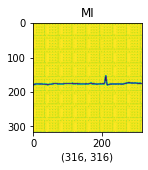

In [51]:
# ploting sample image

figure = plt.figure(figsize=(2,2))
x = plt.imread(df["filepaths"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["label"][0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


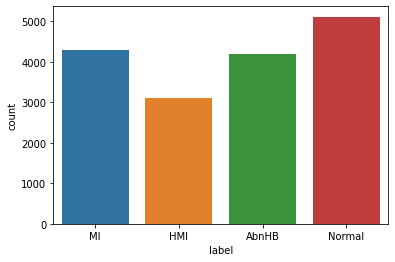

In [52]:
sns.countplot(df["label"])
plt.show();

# I will take 3000 sample image of each category**

In [53]:
df1 = df.copy()

In [54]:
df1_1 = df1[df1['label'] == 'MI'].sample(3000)
df1_2 = df1[df1['label'] == 'HMI'].sample(3000)
df1_3 = df1[df1['label'] == 'AbnHB'].sample(3000)
df1_4 = df1[df1['label'] == 'Normal'].sample(3000)
df_3K = pd.concat([df1_1, df1_2, df1_3,df1_4],ignore_index=True)

In [55]:
# BG Remover  inspired by : @Messaoud Makhlouf 
def bg_remov(image):
    result = salt(image, 10)
    median = cv2.medianBlur(result,5)
    gray = cv2.cvtColor(median, cv2.COLOR_BGR2GRAY)
    (thresh, blackAndWhiteImage) = cv2.threshold(gray, 85, 255, cv2.THRESH_BINARY)
    
    return blackAndWhiteImage

In [56]:
%%time
# Labelencoder to encode the labels 
le = LabelEncoder()
df_3K['label'] = le.fit_transform(df_3K['label'])

data = []     # initialize an empty numpy array
image_size = 100      # image size taken is 100 here. one can take other size too
# the size of the images is between 52 and 75 so choose what ever size you want.
for i in range(len(df_3K)):
    # here I read the image 
    img_array = cv2.imread(df_3K['filepaths'][i])   # converting the image to gray scale
    img_array = bg_remov(img_array)
    new_img_array = cv2.resize(img_array, (image_size, image_size)) 
    data.append([new_img_array, df_3K['label'][i]])

CPU times: user 1min 26s, sys: 26.7 s, total: 1min 53s
Wall time: 39.3 s


In [57]:
np.random.shuffle(data)

x = []
y = []
for image in data:
    x.append(image[0])
    y.append(image[1])

In [58]:
# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [59]:
x = x.reshape(-1, 100, 100, 1)

In [60]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.3, random_state = 42)

In [61]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255

In [62]:
X_train.shape

(8400, 100, 100, 1)

In [63]:
y_train.shape

(8400,)

# Creating the baseline VGG

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D, MaxPool2D,BatchNormalization, Flatten, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential

from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [65]:
cnn = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
tf.keras.layers.MaxPooling2D((2, 2)),

tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),

# tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(4, activation='sigmoid')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2166848   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2

In [67]:
# you can use hostory to check on the progress of your model with tensorboard...
history = cnn.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
66/66 [==============================] - 65s 973ms/step - loss: 1.5106 - accuracy: 0.2750 - val_loss: 1.2611 - val_accuracy: 0.4003
Epoch 2/50
66/66 [==============================] - 62s 946ms/step - loss: 1.2089 - accuracy: 0.4386 - val_loss: 1.1344 - val_accuracy: 0.5006
Epoch 3/50
66/66 [==============================] - 63s 958ms/step - loss: 1.0398 - accuracy: 0.5610 - val_loss: 0.9825 - val_accuracy: 0.5706
Epoch 4/50
66/66 [==============================] - 63s 958ms/step - loss: 0.8714 - accuracy: 0.6409 - val_loss: 0.9852 - val_accuracy: 0.5800
Epoch 5/50
66/66 [==============================] - 63s 957ms/step - loss: 0.7548 - accuracy: 0.6992 - val_loss: 0.7941 - val_accuracy: 0.6744
Epoch 6/50
66/66 [==============================] - 63s 952ms/step - loss: 0.5943 - accuracy: 0.7835 - val_loss: 0.7426 - val_accuracy: 0.7044
Epoch 7/50
66/66 [==============================] - 66s 1s/step - loss: 0.4799 - accuracy: 0.8228 - val_loss: 0.6820 - val_accuracy: 0.7392
Ep

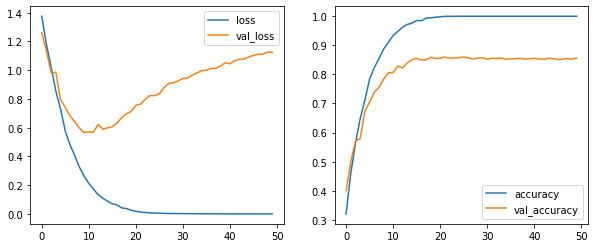

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [69]:
score_head_model= cnn.evaluate(X_val,y_val)
print("Test Loss:", score_head_model[0])
print("Test Accuracy:", score_head_model[1])

113/113 [==============================] - 7s 63ms/step - loss: 1.1232 - accuracy: 0.8558
Test Loss: 1.123244285583496
Test Accuracy: 0.8558333516120911


In [70]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

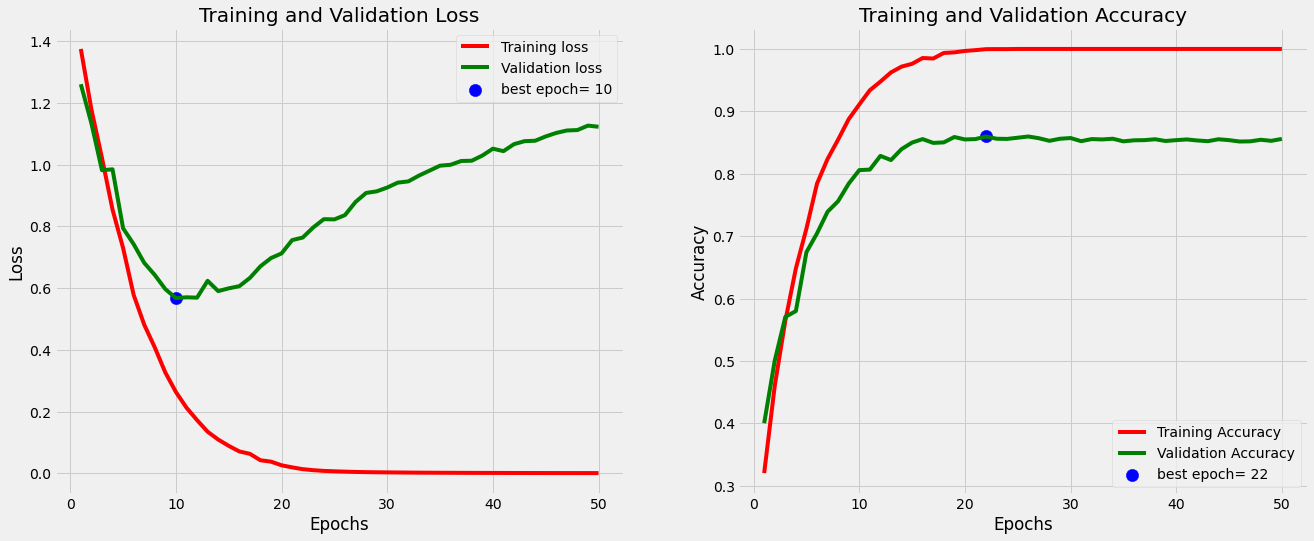

In [71]:
tr_plot(history,0)

# VGG16

In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 4)
y_val = to_categorical(y_val, 4)

In [81]:
base_model = tf.keras.applications.vgg16.VGG16(weights = 'imagenet', include_top = False)

input_tensor = Input(shape=(100,100,1))
x = Conv2D(3,(3,3),padding='same')(input_tensor)    # x has a dimension of (img_height,img_width,3)
x = base_model(x)
x= layers.Dense(150, activation='relu')(x)
x= layers.Dropout(0.3)(x)
predictions = layers.Dense(4, activation = 'softmax')(x)
head_model = Model(inputs = input_tensor, outputs = predictions)
head_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 3)       30        
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 3, 3, 150)         76950     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 150)         0         
_________________________________________________________________
dense_5 (Dense)              (None, 3, 3, 4)           604       
Total params: 14,792,272
Trainable params: 14,792,272
Non-trainable params: 0
_______________________________________________

In [84]:
head_model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
history = head_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

In [ ]:
score_head_model= head_model.evaluate(X_val,y_val)
print("Test Loss:", score_head_model[0])
print("Test Accuracy:", score_head_model[1])

In [77]:
# history Training VGG16
tr_plot(history,0)

# InceptionV3

In [96]:
# InceptionV3
from keras.applications.resnet50 import ResNet50
resNet50 = ResNet50(weights='imagenet', include_top=False)
input_tensor = Input(shape=(100,100,1))
x = Conv2D(3,(3,3),padding='same')(input_tensor)    # x has a dimension of (img_height,img_width,3)
out1 = resNet50(x)
x = Dropout(0.5)(out1)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
out = Dense(4, activation='softmax')(x)

model = Model(inputs = input_tensor, outputs = out)

94773248/94765736 [==============================] - 1s 0us/step


In [97]:
model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [ ]:
%%time
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

In [ ]:
# history Training InceptionV3
tr_plot(history,0)